# Homework 6

## Problem 1

Gapminder is a foundation, based on Sweden, that aims to enhance basic awareness of basic facts about the socioeconomic global world. As part of their efforts, they collect detailed statistics on life expectancy, population, and GDP, sometimes going back over many years. 

Here, we'll work with an excerpt of the Gapminder data. This excerpt has been packaged up and made available via Jenny Bryan's [`gapminder` repo](https://github.com/jennybc/gapminder) on Github. 

Run the code below to retrieve the data and take a look. As usual, you can also directly download the data by pasting the url into your browswer, saving the file, and reading it in locally via `pandas.read_csv`. 

In [1]:
import pandas as pd
        
url = "https://philchodrow.github.io/PIC16A/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


Use the `gapminder` data to create the folowing visualization. Here, each trendline corresponds to a distinct country, which in turn lies on the stated continent. 

<figure class="image" style="width:100%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/homework/gapminder_p1.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

You should achieve this result **without for-loops**, and also without manually creating the plot on each axis. You may find it useful to define additional data structures, such as dictionaries, that assign colors or axis indices to each continent. Feel free to modify aesthetic details of the plots, such as the colors. 

**Hint**: Try `df.groupby(["country"]).apply(f)`, where `f` is some very smart function that you have figured out. 

""


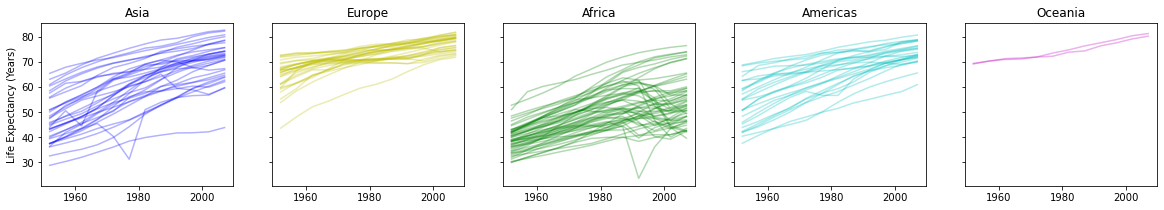

In [2]:
from matplotlib import pyplot as plt

# fig, ax = plt.subplots(...) < call this method with appropriate parameters
fig, ax = plt.subplots(1, 5, sharey = True, figsize = (20,3))
ax[0].set(ylabel = "Life Expectancy (Years)")

# maybe you want to define some things here
name = pd.unique(gapminder["continent"])
color = ["b","y","g","c","m"]

def f(df, **kwargs):
    kwargs = {val:i for i, val in enumerate(name)}
    [ax[j].plot(df["year"],df["lifeExp"], color[j], alpha = 0.3) 
     for j in kwargs.values() if name[j] == pd.unique(df['continent'])]
    [ax[m].set(title = val) for val,m in kwargs.items()]

kwargs = {} # replace with your code, if you want other parameters

gapminder.groupby(['country']).apply(f, **kwargs)

(extra credit)

Pick a country (e.g. Korea) and make that line stand out in your plot. How you do that is up to you - you can change the thickness, color, opacity, linestyles, marker, etc, or even add an arrow pointing to it. There should be a text label somewhere that indicates which country it is. No need to copy/paste, you can alter the original code from the previous part.

## Problem 2

In this problem, you will create a visualization of gender representation in artwork in the [Tate Art Museum](https://github.com/tategallery/collection).
Run the code block below to acquire and prepare the data. There's a lot of information that I've removed in the data preparation below, including the name of the artist, their birth and death dates, and various details about each piece. You may wish to explore the full data sets later, but for now, I thought you'd prefer to be able to focus on only the columns needed for today. 

In [3]:
import pandas as pd
artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

artwork.to_csv("artwork.csv", index = False)
artists.to_csv("artists.csv", index = False)

In [4]:
import pandas as pd
artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

artwork["id"] = artwork["artistId"]
artwork = artwork[["id", "year", "acquisitionYear", "title", "medium"]]
artists = artists[["id", "gender"]]
df = pd.merge(artwork, artists)

def dimension(med_string):
    """
    Assign a dimension to a given piece of artwork based on the description
    of the medium, supplied as a string. 
    Media that include the words "paper", "canvas", "oil", or "paint" are assumed 
    2D. 
    Media that are not 2d and include the words "bronze", "stone", or "ceramic" are 
    assumed 3D. 
    Otherwise, the media is "Other/Unknown"
    
    @param med_string: str, the original medium
    @return dim: one of "2D", "3D", or "Other/Unknown" according to the rules above. 
    """
    if type(med_string) != str:
        med_string = str(med_string)
    med_string = med_string.lower()
    if any([w in med_string for w in ["paper", "canvas", "oil", "paint"]]):
        return "2D"
    elif any([w in med_string for w in ["bronze", "stone", "ceramic"]]):
        return "3D"
    else:
        return "Other/Unknown"

df["dimension"] = [dimension(m) for m in df["medium"]]
df = df[["title","acquisitionYear", "gender", "dimension"]]

- The `title` column gives the title of each piece. 
- The `acquisitionYear` states the year in which the artwork was acquired by the Tate. 
- The `gender` column gives the gender of the artist. 
- The `dimension` column states whether the piece is two-dimensional (like a drawing or a painting) or three-dimensional (like a sculpture or ceramic). This is determined from a more thorough description of the medium using the simple `dimension()` function from above, although a more careful classification might be beneficial. A number of pieces have "Other/Unknown" in this column. 

In [5]:
# use this block to inspect the data if you'd like
df

,title,acquisitionYear,gender,dimension
0,A Figure Bowing before a Seated Old Man with h...,1922.0,Male,2D
1,"Two Drawings of Frightened Figures, Probably f...",1922.0,Male,2D
2,The Preaching of Warning. Verso: An Old Man En...,1922.0,Male,2D
3,Six Drawings of Figures with Outstretched Arms,1922.0,Male,2D
4,The Circle of the Lustful: Francesca da Rimini...,1919.0,Male,2D
...,...,...,...,...
69190,Venus Mound (from Tampax Romana),2013.0,Male,Other/Unknown
69191,It’s That Time Of The Month (from Tampax Romana),2013.0,Male,Other/Unknown
69192,Larvae (from Tampax Romana),2013.0,Male,Other/Unknown
69193,Living Womb (from Tampax Romana),2013.0,Male,2D



#### What You Should Do

Create a plot to answer the following question: 

> How has the amount of artwork **by female artists** increased with time, as a fraction of all artwork owned by the Tate? Are women better represented in the Tate through certain forms of artistic expression than others? 

To answer this question, create the following plot: 

<figure class="image" style="width:80%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/art-output.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

The vertical axis is the percentage of all artwork created by female artists which was acquired on or before the stated date. You may assume that artwork, once acquired, remains permanently with the Tate (i.e. it is not lost or sold).  

### Specs

- There are multiple good approaches. A solution using a `for`- or `while`-loop can receive partial credit. For full credit, no explicit loops! 
- It is not necessary for your output to exactly match mine -- feel free to change colors, modify the labels, etc. However, you should ensure that you include axis labels and the legend. 
- Comments and docstrings are not necessary in this problem. 
- You are free to use any Python tools you find helpful in order to create this plot. 

#### "What if my plot looks different?"

Your final product should closely resemble the supplied example. You may make reasonable alternative choices that lead your plot to look slightly different in small details. You can receive full credit as long as your result looks quantitatively similar and has the same qualitative interpretation.


### Hints

- `np.cumsum()`. You'll need to appropriately sort `df` first in order to get a good result. 

/var/folders/5w/xp5z9h2n0nb3qkgfbvf7cxrm0000gn/T/ipykernel_26153/671409319.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"][df["gender"] == 'Female'] = 1
/var/folders/5w/xp5z9h2n0nb3qkgfbvf7cxrm0000gn/T/ipykernel_26153/671409319.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"][df["gender"] == 'Male'] = 0


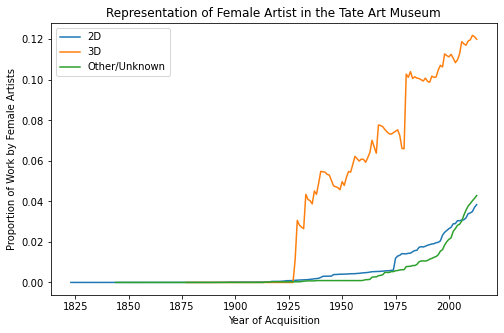

In [8]:
# your solution here
import numpy as np
fig, ax = plt.subplots(1, 1, figsize = (8,5))
ax.set(xlabel = "Year of Acquisition")
ax.set(ylabel = "Proportion of Work by Female Artists")
ax.set(title = "Representation of Female Artist in the Tate Art Museum")

df = df.dropna()
df["acquisitionYear"] = df["acquisitionYear"].astype(int)
df = df.sort_values(by=['acquisitionYear'])
df["gender"][df["gender"] == 'Female'] = 1
df["gender"][df["gender"] == 'Male'] = 0

dim = ["2D", "3D", "Other/Unknown"]

b = df.groupby(['dimension','acquisitionYear'])["gender"].aggregate([np.size, np.sum])
[ax.plot(b.loc[m].reset_index()["acquisitionYear"], 
         np.cumsum(b.loc[m].reset_index()["sum"])/np.cumsum(b.loc[m].reset_index()["size"]), 
         label = m) 
for m in dim]
ax.legend()


> The proportion of female artists' artwork increased dramatically from 1925. Before then, the Tate Museum seldom included female artists' artwork. The proportion of female artist's representation among the 3D artworks is greater than the other two, so we may say women are better represented in the Tate through 3D artworks.

## Problem 3

Work on your project! Describe in a couple of sentences what your group has worked on so far and/or just put in a screenshot of something happening. You can also write down what the main challenges have been and if you need help. This part of HW is graded on completion, so don't worry if you haven't made much progress yet.

>We've finished the data cleaning and visualization parts of our project. The next step is applying the linear regression model. One challenge that we met but haven't solved is that we tried to change the color of the interactive plot, but it automatically changed the order of the data.

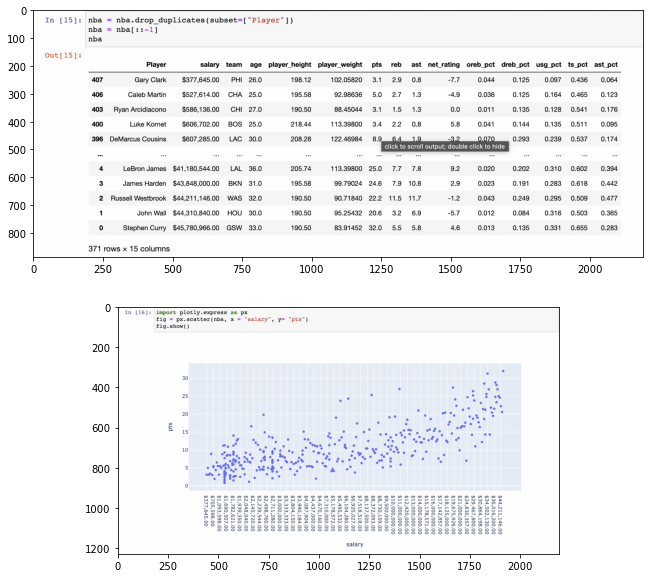

In [7]:
import matplotlib.image as mpimg
img_1 = mpimg.imread('data.jpg')
img_2 = mpimg.imread('plotly.jpg')
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].imshow(img_1)
ax[1].imshow(img_2)